## <center>Boston House Price Problem</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error,r2_score,mean_squared_error
%matplotlib inline

## <center>Understanding columns:</center>
- CRIM: This measures the per capita crime rate in each town. Higher crime rates might be associated with lower property values.
- ZN: This indicates the proportion of land zoned for large residential lots. Areas with more zoning for larger lots could have higher property values.
- INDUS: This represents the proportion of non-retail business acres in a town. Higher industrial activity might not be as desirable for residential living, potentially affecting property values.
- CHAS: This is a binary variable that indicates whether a tract of land borders the Charles River. Proximity to the river could be considered a desirable feature, potentially increasing property values.
- NOX: This measures the concentration of nitric oxides, which is often associated with pollution and might negatively impact property values.
- RM: This represents the average number of rooms per dwelling. Homes with more rooms are generally considered more desirable and could have higher values.
- AGE: This indicates the proportion of owner-occupied units built before 1940. Older homes might require more maintenance and could have lower values compared to newer ones.
- DIS: This measures the weighted distances to various Boston employment centers. Proximity to employment opportunities could be a positive factor for property values.
- RAD: This represents the accessibility to radial highways. Good access to transportation might increase property values.
- TAX: This is the full-value property tax rate per $10,000. Higher taxes could negatively impact property values.
- PTRATIO: This measures the pupil-teacher ratio in each town. A lower pupil-teacher ratio might be seen as a positive factor for schools and property values.
- LSTAT: This represents the percentage of the population considered lower-status. A higher percentage of lower-status residents might be associated with lower property values.

## <center>Target Variable:</center>
- MEDV: This is the median value of owner-occupied homes in $1000's. This is the variable you're trying to predict using the other variables in the dataset.

## How does the data looks like?

In [2]:
df=pd.DataFrame(pd.read_csv(r"E:\DEP\archive\Boston-house-price-data.csv"))
df.sample(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
135  0.55778   0.0  21.89     0  0.624  6.335  98.2  2.1107    4  437.0   
101  0.11432   0.0   8.56     0  0.520  6.781  71.3  2.8561    5  384.0   
423  7.05042   0.0  18.10     0  0.614  6.103  85.1  2.0218   24  666.0   
181  0.06888   0.0   2.46     0  0.488  6.144  62.2  2.5979    3  193.0   
300  0.04417  70.0   2.24     0  0.400  6.871  47.4  7.8278    5  358.0   

     PTRATIO       B  LSTAT  MEDV  
135     21.2  394.67  16.96  18.1  
101     20.9  395.58   7.67  26.5  
423     20.2    2.52  23.29  13.4  
181     17.8  396.90   9.45  36.2  
300     14.8  390.86   6.07  24.8

In [3]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## What is the data type of columns & Are there any missing values?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## How does the data looks mathematically?

In [5]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## How big is the data & Are there any duplicate values?

In [6]:
shape=df.shape
print(f"Shape: {shape}\nRow: {shape[0]}, Column: {shape[1]} and total entries: {shape[0]*shape[1]}\nTotal number of duplicate value: {df.duplicated().sum()} ")

Shape: (506, 14)
Row: 506, Column: 14 and total entries: 7084
Total number of duplicate value: 0 


## How is the Corelation between the columns?

In [7]:
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [8]:
df.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

## <center>Visualization before scaling:</center>

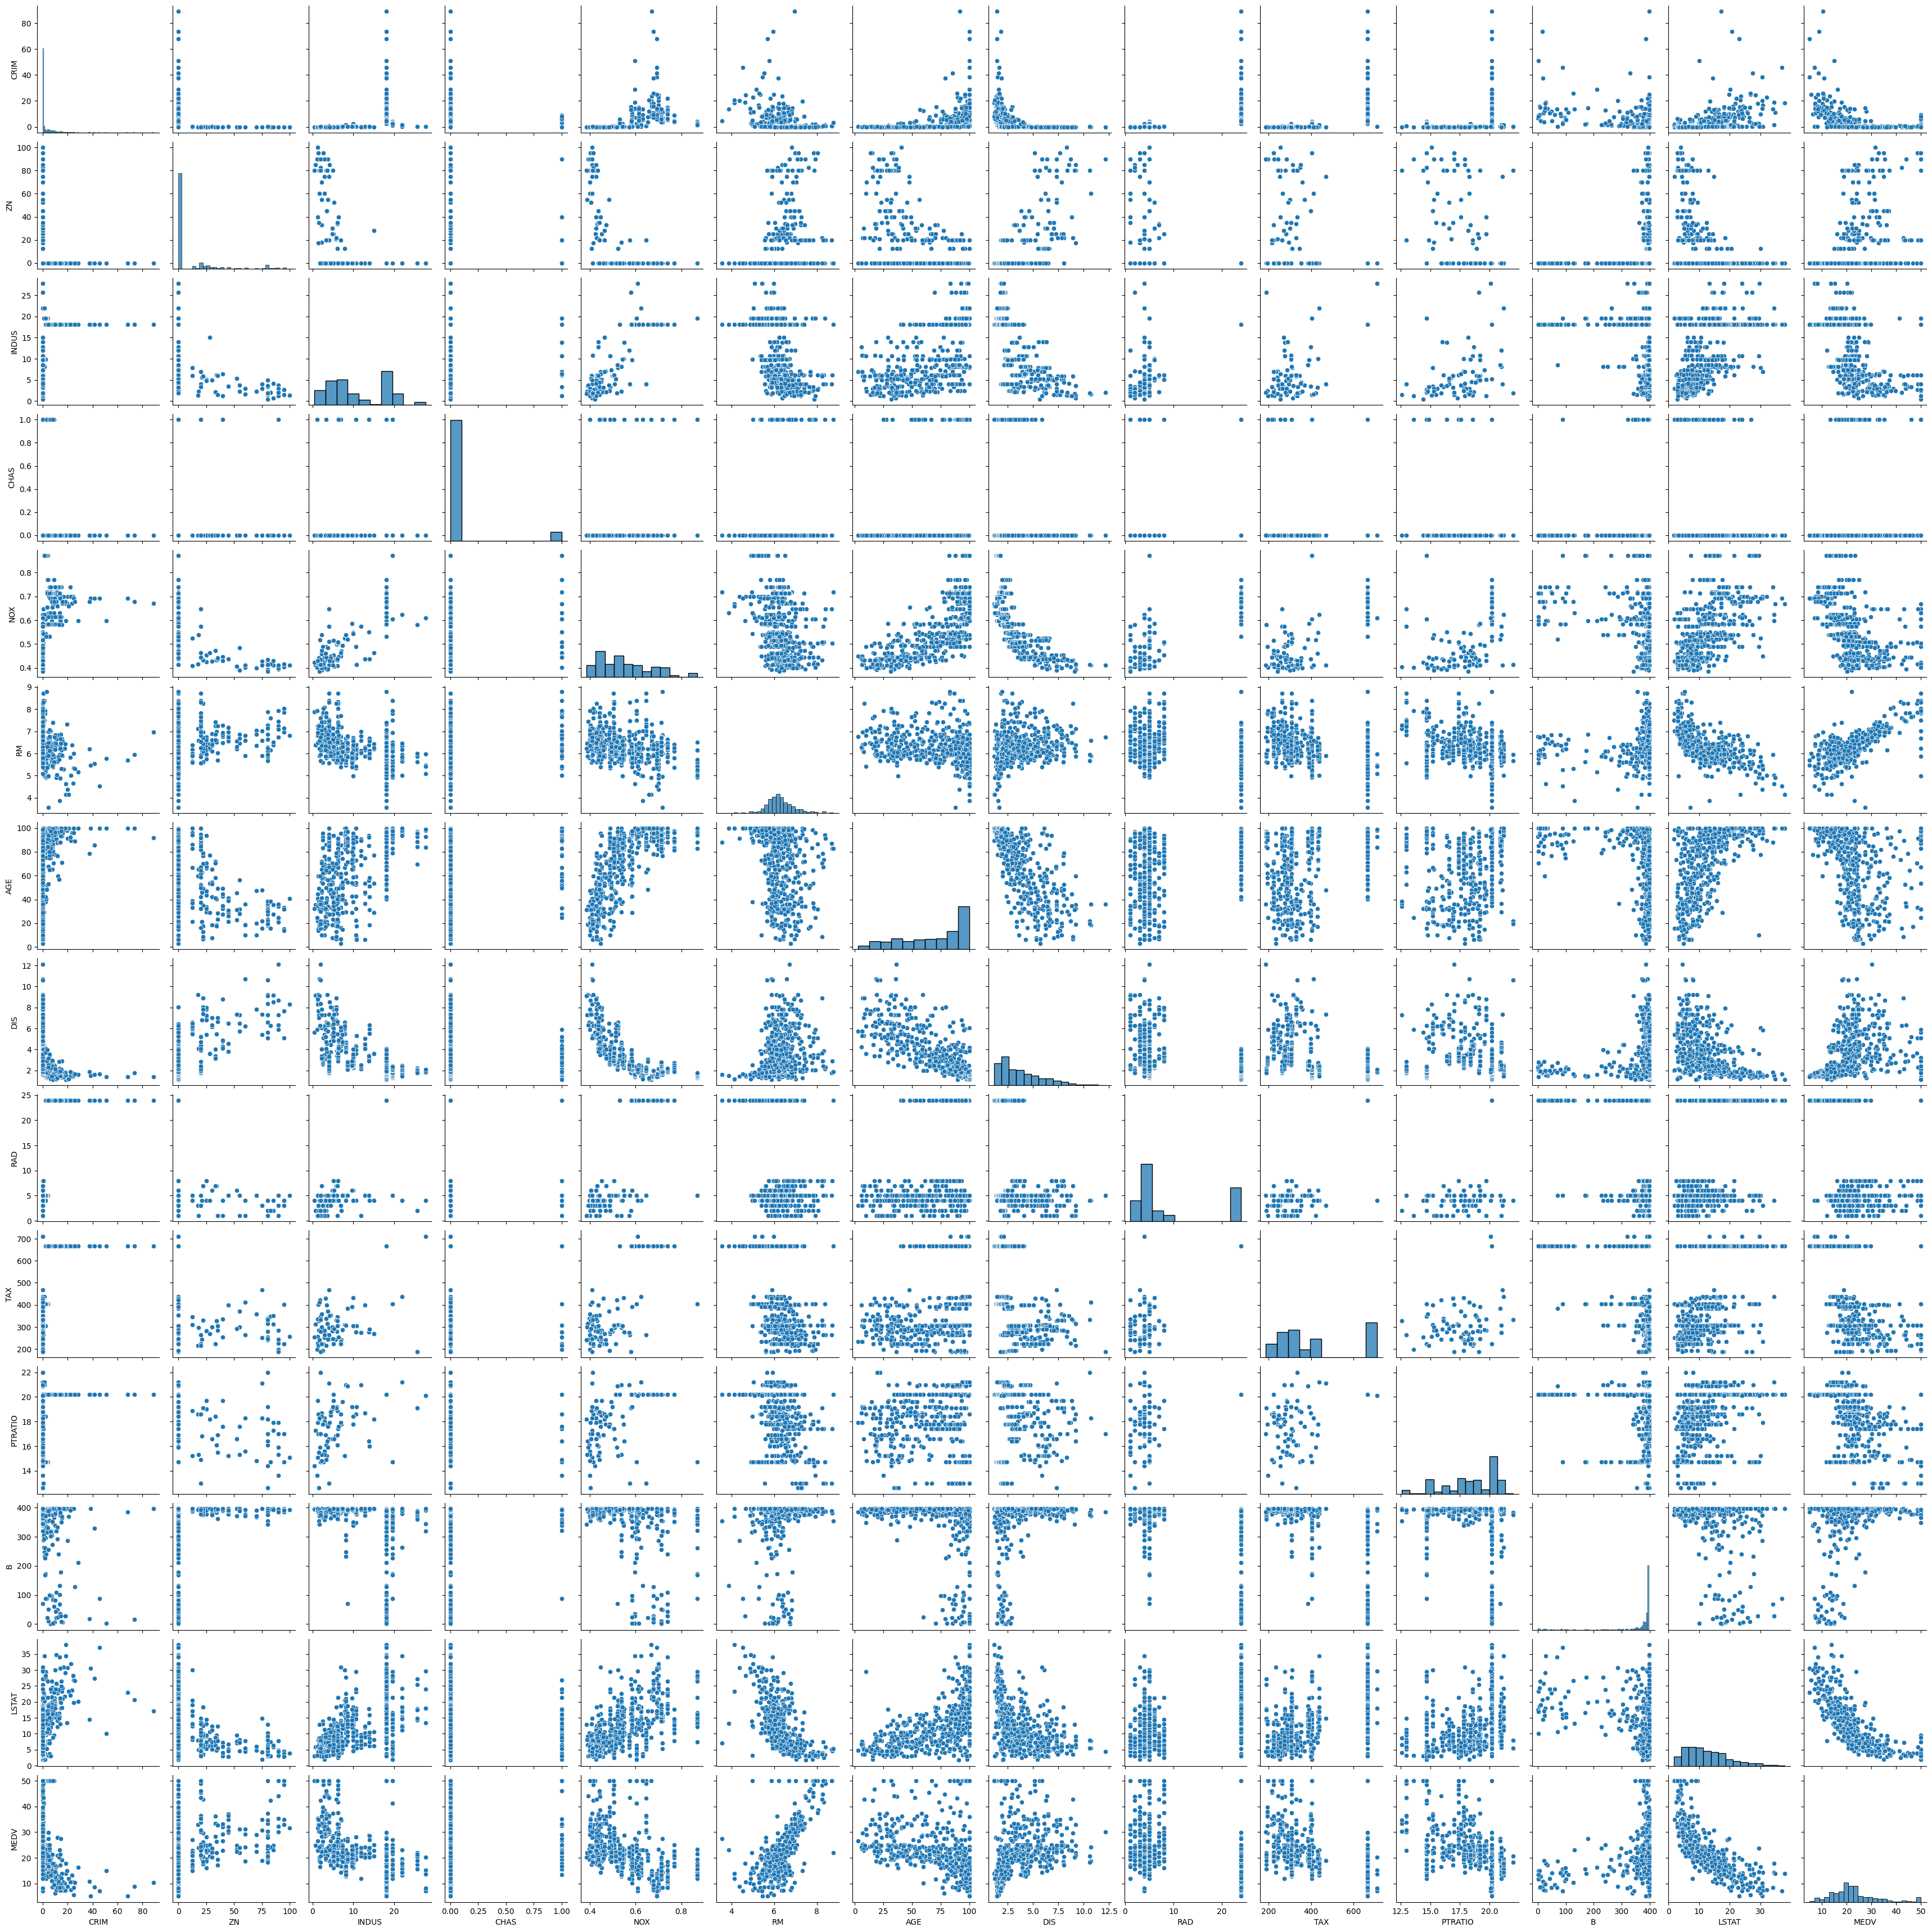

In [9]:
sns.pairplot(df)
plt.show()

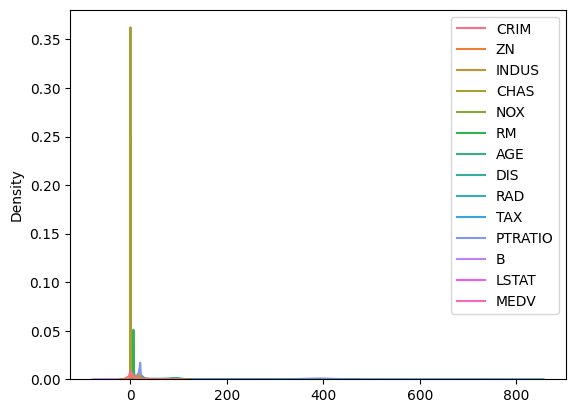

In [10]:
sns.kdeplot(df)
plt.show()

## <center>Feature Engineering:</center>
- As we can see that scale is very different this is why graph looks like this and it needs Feature engineering to deal with Scale and Multicollinearity 
- We would have to apply feature engineering to it (Standardization for scaling and Principal Component Analysis)

## Principal Component Analysis

In [11]:
df['Industrial_Age'] = df['INDUS'] * df['AGE']
features = ['INDUS', 'NOX', 'DIS', 'ZN']
pca = PCA(n_components=1)
neighborhood_quality = pca.fit_transform(df[features])
df['neighborhood_quality'] = neighborhood_quality

In [12]:
df.sample(5)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
167   1.80028   0.0  19.58     0  0.605  5.877   79.2  2.4259    5  403.0   
374  18.49820   0.0  18.10     0  0.668  4.138  100.0  1.1370   24  666.0   
60    0.14932  25.0   5.13     0  0.453  5.741   66.2  7.2254    8  284.0   
78    0.05646   0.0  12.83     0  0.437  6.232   53.7  5.0141    5  398.0   
244   0.20608  22.0   5.86     0  0.431  5.593   76.5  7.9549    7  330.0   

     PTRATIO       B  LSTAT  MEDV  Industrial_Age  neighborhood_quality  
167     14.7  227.61  12.14  23.8        1550.736            -12.663359  
374     20.2  396.90  37.97  13.8        1810.000            -12.497654  
60      19.7  395.11  13.15  18.7         339.606             14.624024  
78      18.7  386.40  12.34  21.2         688.971            -11.391418  
244     19.1  372.49  12.50  17.6         448.290             11.594755

In [13]:
df.drop(['INDUS', 'AGE','NOX', 'DIS', 'ZN'], axis=1, inplace=True)

In [14]:
df.sample(5)

CRIM  CHAS     RM  RAD    TAX  PTRATIO       B  LSTAT  MEDV  \
82   0.03659     0  6.302    4  281.0     19.0  396.90   6.72  24.8   
62   0.11027     0  6.456    8  284.0     19.7  396.90   6.73  22.2   
340  0.06151     0  5.968    5  224.0     20.2  396.90   9.29  18.7   
345  0.03113     0  6.014    3  352.0     18.8  385.64  10.53  17.5   
135  0.55778     0  6.335    4  437.0     21.2  394.67  16.96  18.1   

     Industrial_Age  neighborhood_quality  
82          156.492             14.557671  
62          347.814             14.624030  
340         303.615            -10.142944  
345         212.915             -9.815988  
135        2149.598            -13.063841

## Train-Test split:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1),df['MEDV'] , test_size=0.2, random_state=0)

##  Standardization

In [16]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

y_train_scaled = y_train
y_test_scaled = y_test

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [17]:
np.round(X_train_scaled.describe(),1)

CRIM   CHAS     RM    RAD    TAX  PTRATIO      B  LSTAT  \
count  404.0  404.0  404.0  404.0  404.0    404.0  404.0  404.0   
mean    -0.0    0.0    0.0   -0.0    0.0      0.0   -0.0    0.0   
std      1.0    1.0    1.0    1.0    1.0      1.0    1.0    1.0   
min     -0.4   -0.3   -4.0   -1.0   -1.3     -2.7   -4.0   -1.5   
25%     -0.4   -0.3   -0.6   -0.6   -0.7     -0.5    0.2   -0.8   
50%     -0.4   -0.3   -0.1   -0.5   -0.5      0.3    0.4   -0.2   
75%     -0.0   -0.3    0.5    1.7    1.5      0.8    0.4    0.6   
max     10.5    3.7    3.6    1.7    1.8      1.6    0.4    3.3   

       Industrial_Age  neighborhood_quality  
count           404.0                 404.0  
mean              0.0                   0.0  
std               1.0                   1.0  
min              -1.2                  -0.6  
25%              -0.9                  -0.5  
50%              -0.3                  -0.5  
75%               1.1                   0.4  
max               2.5                   3.7

## <center>Visualization after scaling:</center>

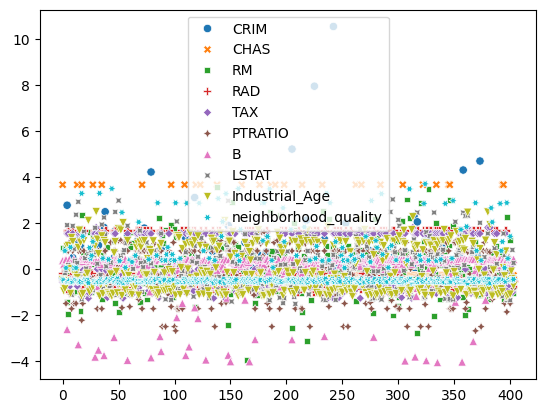

In [18]:
sns.scatterplot(X_train_scaled)
plt.show()

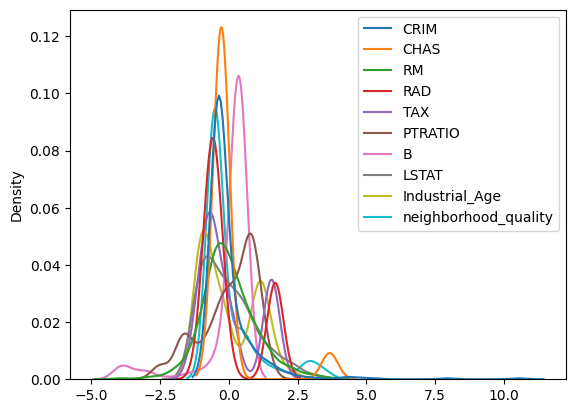

In [19]:
sns.kdeplot(X_train_scaled)
plt.show()

In [20]:
np.round(X_train_scaled.describe(),1)

CRIM   CHAS     RM    RAD    TAX  PTRATIO      B  LSTAT  \
count  404.0  404.0  404.0  404.0  404.0    404.0  404.0  404.0   
mean    -0.0    0.0    0.0   -0.0    0.0      0.0   -0.0    0.0   
std      1.0    1.0    1.0    1.0    1.0      1.0    1.0    1.0   
min     -0.4   -0.3   -4.0   -1.0   -1.3     -2.7   -4.0   -1.5   
25%     -0.4   -0.3   -0.6   -0.6   -0.7     -0.5    0.2   -0.8   
50%     -0.4   -0.3   -0.1   -0.5   -0.5      0.3    0.4   -0.2   
75%     -0.0   -0.3    0.5    1.7    1.5      0.8    0.4    0.6   
max     10.5    3.7    3.6    1.7    1.8      1.6    0.4    3.3   

       Industrial_Age  neighborhood_quality  
count           404.0                 404.0  
mean              0.0                   0.0  
std               1.0                   1.0  
min              -1.2                  -0.6  
25%              -0.9                  -0.5  
50%              -0.3                  -0.5  
75%               1.1                   0.4  
max               2.5                   3.7

## <center>Applying machine learning algorithm:</center>

## Linear Regression

In [21]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train_scaled)
prediction=lr.predict(X_test_scaled)
print("root_mean_squared_error",root_mean_squared_error(y_test,prediction))
print("r2_score",r2_score(y_test,prediction))

root_mean_squared_error 6.1979603884977665
r2_score 0.5282396000715947


## Random Forest Regressor

In [25]:
reg = RandomForestRegressor()
reg.fit(X_train_scaled, y_train)
y_pred_reg = reg.predict(X_test_scaled)
print("root_mean_squared_error",root_mean_squared_error(y_test,y_pred_reg))
print("r2_score",r2_score(y_test,y_pred_reg))

root_mean_squared_error 4.770025972100132
r2_score 0.7205749239867707


## <center>Results</center>
Random Forest Regressor appears to be a better choice for your Boston housing price prediction task.

- Root Mean Squared Error (RMSE): Random Forest has a lower RMSE (4.83) compared to Linear Regression (6.19). This indicates that Random Forest makes more accurate predictions on average.
- R-squared: Random Forest also has a higher R-squared (0.72) compared to Linear Regression (0.52). This means that Random Forest explains a larger proportion of the variance in the target variable (house prices).